In [266]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

In [267]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(path = "imdb.npz",
                                                      num_words = None,
                                                      skip_top = 0,
                                                      maxlen = None,
                                                      seed = 550,
                                                      start_char = 1,
                                                      oov_char = 2,
                                                      index_from = 3)

In [268]:
print("Type:", type(X_train))
print("Type:", type(Y_train))

print("X train shape: ", X_train.shape)
print("Y train shape: ", Y_train.shape)

Type: <class 'numpy.ndarray'>
Type: <class 'numpy.ndarray'>
X train shape:  (25000,)
Y train shape:  (25000,)


### EDA

In [269]:
print("Y Train values: ",np.unique(Y_train))
print("Y Test values: ",np.unique(Y_test))

Y Train values:  [0 1]
Y Test values:  [0 1]


In [270]:
unique, counts = np.unique(Y_train, return_counts = True)
print("Y train distribution: ",dict(zip(unique, counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [271]:
unique, counts = np.unique(Y_test, return_counts = True)
print("Y train distribution: ",dict(zip(unique, counts)))

Y train distribution:  {0: 12500, 1: 12500}


Text(0.5, 1.0, 'Y train')

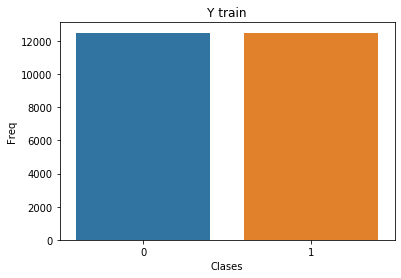

In [272]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Clases")
plt.ylabel("Freq")
plt.title("Y train")

Text(0.5, 1.0, 'Y test')

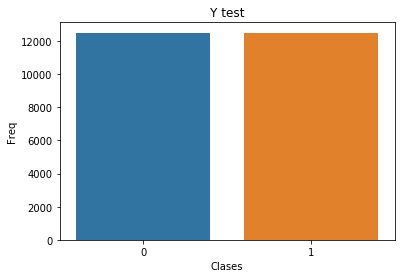

In [273]:
plt.figure()
sns.countplot(Y_test)
plt.xlabel("Clases")
plt.ylabel("Freq")
plt.title("Y test")

In [274]:
d = X_train[0]
print(d)
print(len(d))

[1, 3845, 1745, 716, 4, 147, 113, 453, 7, 4, 1787, 18, 6, 1435, 455, 2278, 4, 24935, 10823, 14, 87, 22, 287, 4, 196, 1311, 12, 562, 8, 353, 8, 34162, 6, 455, 4, 22, 287, 89, 2420, 203, 21136, 1678, 4, 455, 8, 1743, 27, 6063, 18, 120, 1691, 153, 869, 120, 1570, 1484, 669, 372, 5, 476, 4, 354, 7, 1660, 7592, 17, 4, 485, 1255, 5, 2597, 3294, 17, 4, 444, 3500, 485, 16, 897, 4125, 18026, 17, 4, 10823, 13265, 83124, 13101, 14, 9, 4, 552, 7, 22, 63, 80, 27636, 25, 5, 1241, 28, 25, 23, 4, 3077, 11503, 4, 147, 420, 14, 6, 22, 24, 8, 30, 1049, 12, 13240, 13, 264, 23, 4285, 5, 115, 122, 79, 6, 2253, 766, 8, 61, 1897, 87, 22]
133


In [275]:
review_len_train= []
review_len_test= []
for i, ii in zip(X_train, X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(ii))

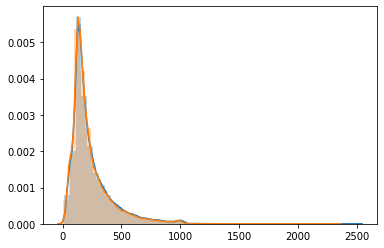

In [276]:
sns.distplot(review_len_train, hist_kws = {"alpha":0.3})
sns.distplot(review_len_test, hist_kws = {"alpha":0.3})

In [277]:
print("Train Mean:",np.mean(review_len_train))
print("Train Median:",np.median(review_len_train))
print("Train Mode:",stats.mode(review_len_train))

Train Mean: 238.71364
Train Median: 178.0
Train Mode: ModeResult(mode=array([132]), count=array([196]))


### number of words

In [278]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

<class 'dict'>
88584


In [279]:
for keys, values in word_index.items():
    if values == 11111:
        print(keys)

income


In [280]:
def whatItSay(index = 24):
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i - 3, "!")for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review
decoded_review = whatItSay(36)

! i admit to liking a lot of the so called frat pack movies no matter how bad they are i can find something to like about ben stiller or owen wilson or vince vaughn or will ferrell or jack black but envy just left me about as cold as the white horse that ben disposed of this time it's ben and jack black as a couple of nutty neighbors one of whom black discovers a aerosol spray to make animal poop disappear and becomes incredibly wealthy while the other stiller writhes in envy that's supposedly the plot but then it veers off in other directions that don't really make much sense br br i guess the 'vapoorize' thing is sort of amusing at first the problem is they try to sustain the gag for the whole picture black has a license plate that reads 'caca king' and it gets fairly tiresome but even ben and jack are used poorly the energy level for both of their performances seems significantly dialed down the two best performances by far are rachel weisz and chris walken walken's neo hippie dippi

### Preprocessing

In [281]:
num_words = 15000

In [282]:
(X_train, Y_train),(X_test, Y_test) = imdb.load_data(num_words = 15000)

In [283]:
maxlen = 130
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [284]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [285]:
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [286]:
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


### RNN

In [287]:
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_train[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 130, 32)           480000    
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 16)                784       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [288]:
history = rnn.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 5, batch_size= 128, verbose = 1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 10s 414us/step - loss: 0.6406 - accuracy: 0.6379 - val_loss: 0.5098 - val_accuracy: 0.7953
Epoch 2/5
25000/25000 [==============================] - 9s 363us/step - loss: 0.4603 - accuracy: 0.8218 - val_loss: 0.4084 - val_accuracy: 0.8378
Epoch 3/5
25000/25000 [==============================] - 10s 385us/step - loss: 0.3479 - accuracy: 0.8643 - val_loss: 0.3612 - val_accuracy: 0.8459
Epoch 4/5
25000/25000 [==============================] - 9s 371us/step - loss: 0.2827 - accuracy: 0.8870 - val_loss: 0.4091 - val_accuracy: 0.8217
Epoch 5/5
25000/25000 [==============================] - 10s 384us/step - loss: 0.2526 - accuracy: 0.9026 - val_loss: 0.3711 - val_accuracy: 0.8452


In [289]:
score = rnn.evaluate(X_test, Y_test)
print("accuracy: ",score[1]*100)

25000/25000 [==============================] - 6s 256us/step
accuracy:  84.52000021934509


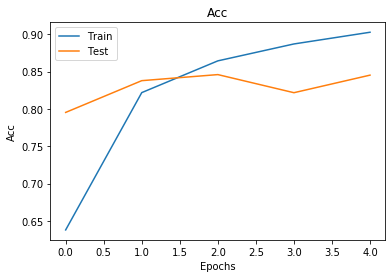

In [290]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()

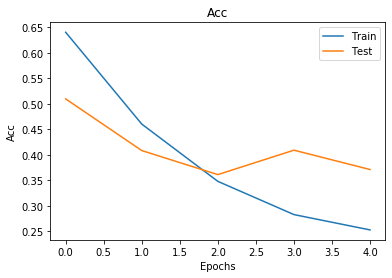

In [291]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Acc")
plt.ylabel("Acc")
plt.xlabel("Epochs")
plt.legend()
plt.show()